In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression

In [ ]:
path1 = '/content/hour.csv'
path2 = '/content/day.csv'
dfhr = pd.read_csv(path1)
dfday = pd.read_csv(path2)


- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



In [ ]:
dfhr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
dfhr.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
dfhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
dfday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
dfday.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:

# Preprocess the data
dfhr['dteday'] = pd.to_datetime(dfhr['dteday'])
dfhr['year'] = dfhr['dteday'].dt.year
dfhr['month'] = dfhr['dteday'].dt.month
dfhr['day'] = dfhr['dteday'].dt.day

# Convert 'dteday' to a numerical format
dfhr['dteday'] = (dfhr['dteday'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Drop unnecessary columns
dfhr = dfhr.drop(['instant', 'casual', 'registered'], axis=1)

# Define the features (X) and the target (y)
X = dfhr.drop('cnt', axis=1)
y = dfhr['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the bike rental counts
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 1638.6322978998849
Root Mean Squared Error: 40.480023442432504
R2 Score: 0.9482516655006054


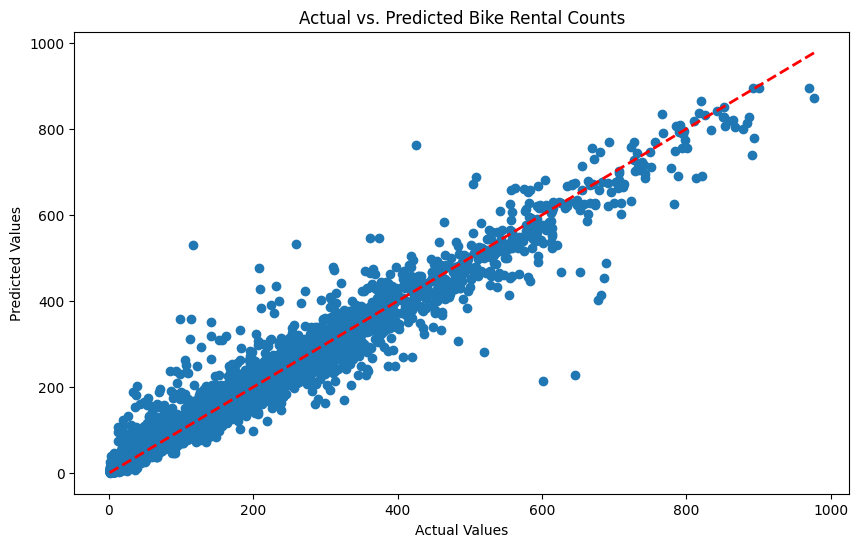

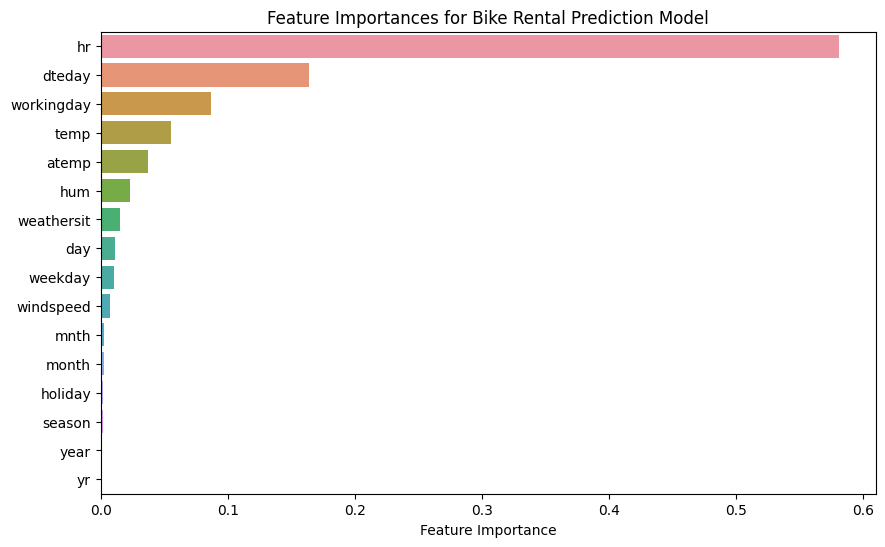

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Bike Rental Counts')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.show()

# Plot feature importances (only for tree-based models like RandomForestRegressor)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], orient='h')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Bike Rental Prediction Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies detected:
           dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
18     1293840000       1   0     1  18        0        6           0   
19     1293840000       1   0     1  19        0        6           0   
22     1293840000       1   0     1  22        0        6           0   
23     1293840000       1   0     1  23        0        6           0   
42     1293926400       1   0     1  19        0        0           0   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17328  1356739200       1   1    12  21        0        6           0   
17329  1356739200       1   1    12  22        0        6           0   
17341  1356825600       1   1    12  10        0        0           0   
17343  1356825600       1   1    12  12        0        0           0   
17344  1356825600       1   1    12  13        0        0           0   

       weathersit  temp   atemp   hum  windspeed  cnt  year  month  day  \
18              3  0.42  0.4

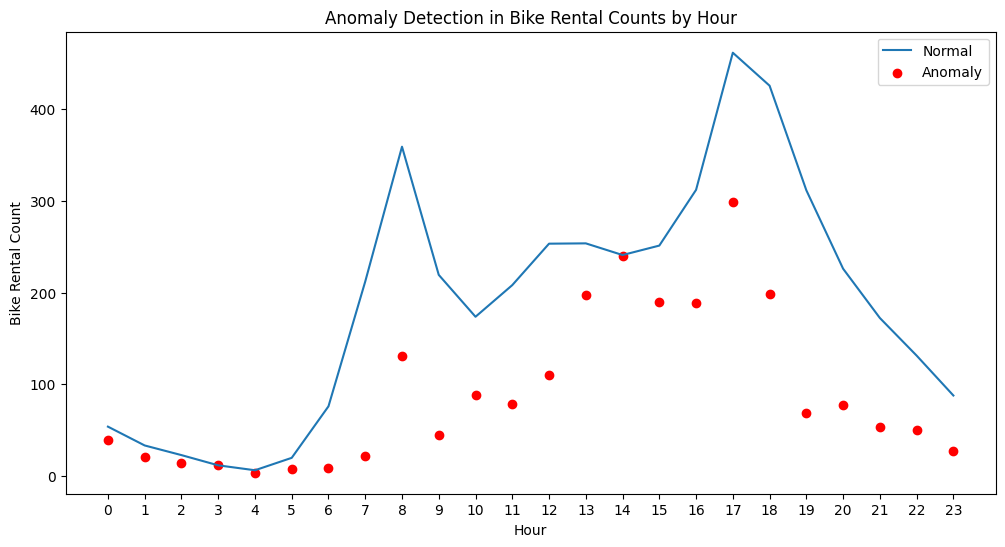

In [ ]:
# Fit Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(dfhr)

# Predict anomalies
anomaly_scores = model.decision_function(dfhr)
anomalies = model.predict(dfhr)

# Add anomaly information to the dataset
dfhr['anomaly_score'] = anomaly_scores
dfhr['anomaly'] = anomalies

# Display the anomalies
anomaly_data = dfhr[dfhr['anomaly'] == -1]
print("Anomalies detected:")
print(anomaly_data)

# Calculate average bike rental count per hour
hourly_avg = dfhr.groupby('hr')['cnt'].mean()
hourly_anomalies = anomaly_data.groupby('hr')['cnt'].mean()

# Plot anomalies over the bike rental count ('cnt') by hour
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg, label='Normal')
plt.scatter(hourly_anomalies.index, hourly_anomalies, color='red', label='Anomaly')
plt.xlabel('Hour')
plt.ylabel('Bike Rental Count')
plt.title('Anomaly Detection in Bike Rental Counts by Hour')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

Predict the daily demand for bikes:

In [ ]:
df = dfday.drop(['instant', 'dteday', 'casual', 'registered'], axis=1) # Drop unnecessary columns

In [ ]:
# Train-test split
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models (example: linear regression)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate models
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')
print(f'R^2 score: {r2:.2f}')


Mean squared error: 751126.23
R^2 score: 0.81


Visualizations:

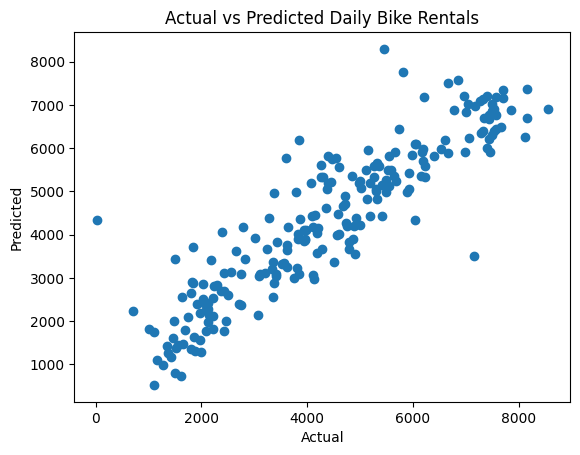

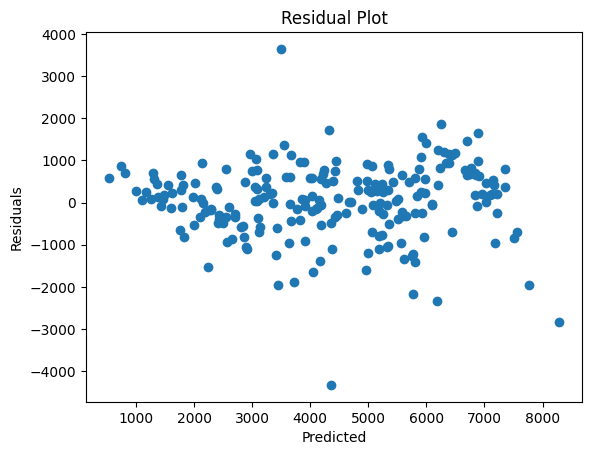

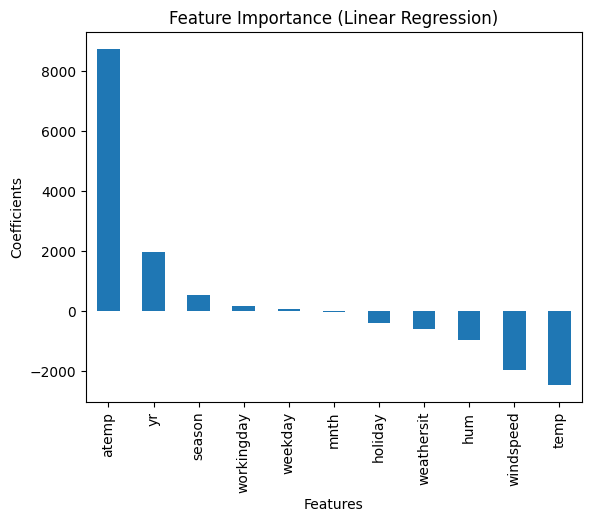

In [ ]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Daily Bike Rentals')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Bar chart of feature importance (coefficients)
coefficients = pd.Series(lr.coef_, index=X.columns)
coefficients.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Importance (Linear Regression)')
plt.show()

Anomaly Detection for Daily Data:

Anomalies detected:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


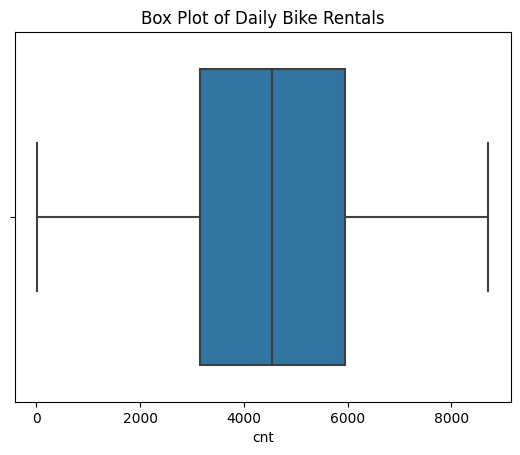

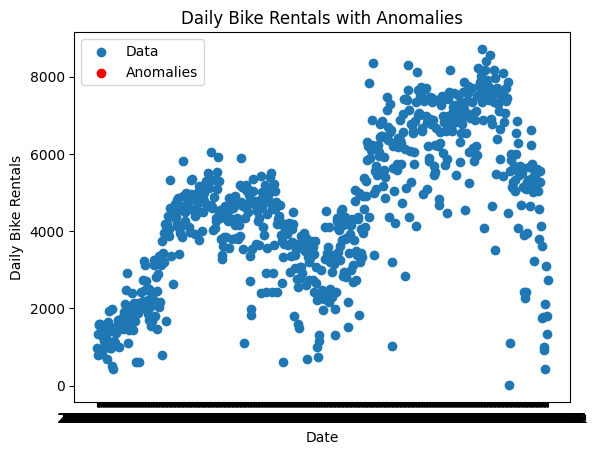

In [ ]:
# Calculate the Interquartile Range (IQR) for 'cnt' (total rental bikes)
Q1 = dfday['cnt'].quantile(0.25)
Q3 = dfday['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify anomalies
anomalies = dfday[(dfday['cnt'] < lower_bound) | (dfday['cnt'] > upper_bound)]

# Print the anomalies
print("Anomalies detected:")
print(anomalies)

# Visualize the anomalies with a box plot
sns.boxplot(data=dfday, x='cnt')
plt.title('Box Plot of Daily Bike Rentals')
plt.show()

# Visualize the anomalies with a scatter plot (using 'dteday' as x-axis)
plt.scatter(dfday['dteday'], dfday['cnt'], label='Data')
plt.scatter(anomalies['dteday'], anomalies['cnt'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Daily Bike Rentals')
plt.title('Daily Bike Rentals with Anomalies')
plt.legend()
plt.show()

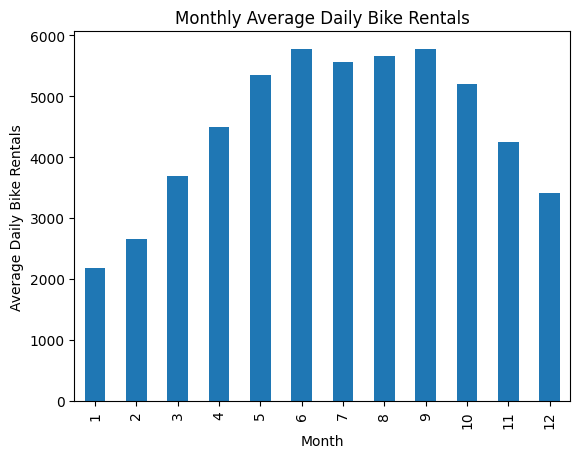

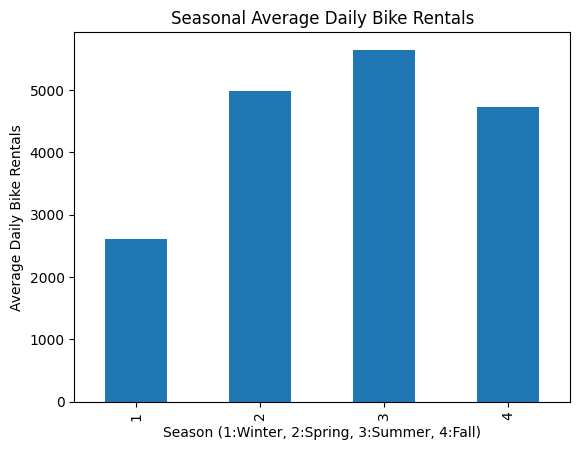

In [ ]:
# Convert 'dteday' to datetime format
dfday['dteday'] = pd.to_datetime(dfday['dteday'])

# Calculate the average daily bike rentals for each month
monthly_avg = dfday.groupby(dfday['dteday'].dt.month)['cnt'].mean()

# Plot the average daily bike rentals for each month
monthly_avg.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Daily Bike Rentals')
plt.title('Monthly Average Daily Bike Rentals')
plt.show()

# Calculate the average daily bike rentals for each season
seasonal_avg = dfday.groupby('season')['cnt'].mean()

# Plot the average daily bike rentals for each season
seasonal_avg.plot(kind='bar')
plt.xlabel('Season (1:Winter, 2:Spring, 3:Summer, 4:Fall)')
plt.ylabel('Average Daily Bike Rentals')
plt.title('Seasonal Average Daily Bike Rentals')
plt.show()